# Chapter 1: Implementing and Evaluating Image Segmentation Metrics

We will use the `scikit-image` library to load images and their segmentation maps, along with other libraries such as `Numpy` and `Matplotlib` for computing and visualization. Below is the Python-based laboratory focused on implementing and applying segmentation evaluation metrics.

---

**Objective**

- Use an image dataset from `scikit-image` to load images and segmentation maps.
- Implement key evaluation metric for **Acurracy Evaluation**, **Regional Quality Evaluation**, and **Contour Quality Evaluation**

## Dataset Configuration

The following code downloads and loads the PASCAL VOC dataset.

In [6]:
import torchvision.transforms.functional as TF
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu

Using downloaded and verified file: ./datasets/VOCtrainval_11-May-2012.tar
Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets


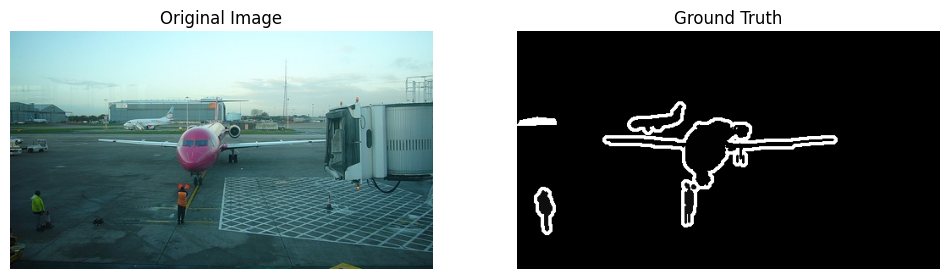

In [8]:
# Define a custom transform function
def custom_transforms(img, target):
    img = TF.to_tensor(img)  # Convert image to tensor
    target = TF.to_tensor(target)  # Convert mask to tensor
    return img, target

# Load the PASCAL VOC dataset with the custom transform
dataset = torchvision.datasets.VOCSegmentation(
    root='./datasets',
    year='2012',
    image_set='trainval',
    download=True,
    transforms=custom_transforms,  # Use the custom transform
)

# Visualize one image and its ground truth mask
image, target = dataset[0]  # First image and corresponding ground truth

# Display the image and mask

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image.permute(1, 2, 0))  # Convert tensor to image
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.imshow(target.squeeze(), cmap='gray')  # Remove extra dimensions for visualization
plt.axis("off")

plt.show()


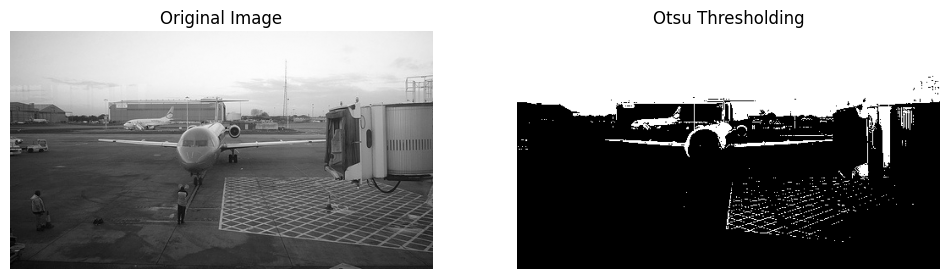

In [10]:
# Convert image to grayscale for Otsu's method
image_gray = image.mean(dim=0).numpy()  # Convert to grayscale (average across channels)
threshold = threshold_otsu(image_gray)  # Compute Otsu's threshold
otsu_mask = image_gray > threshold  # Create binary mask

# Display the image and otsu mask

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Otsu Thresholding")
plt.imshow(otsu_mask, cmap='gray')  # Remove extra dimensions for visualization
plt.axis("off")

plt.show()